In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eda-project-analyze-us-citizens/adult_eda.csv


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('/kaggle/input/eda-project-analyze-us-citizens/adult_eda.csv')

In [42]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [43]:
obj=df.describe(include="object").columns

In [44]:
obj

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'salary'],
      dtype='object')

In [45]:
for col in obj:
    print(col)
    print(df[col].value_counts())
    print('******************')

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
******************
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
******************
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
******************
occupation

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [47]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [48]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [49]:
df=df.dropna(axis=1)

In [50]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

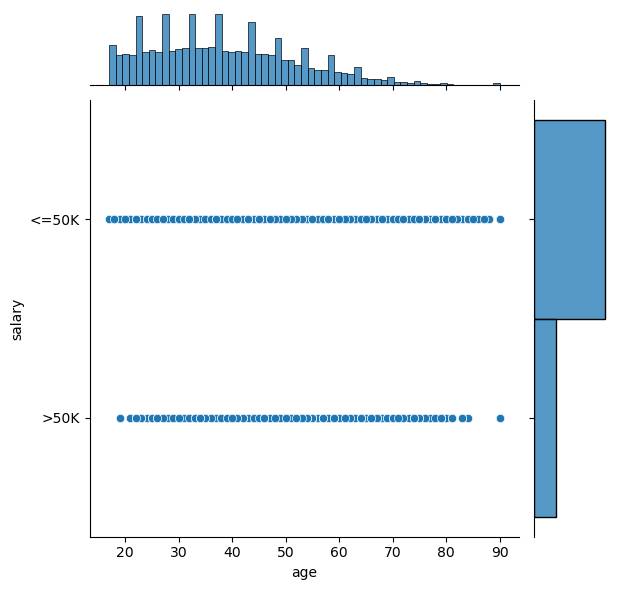

In [51]:
sns.jointplot(x="age",y="salary",data=df)

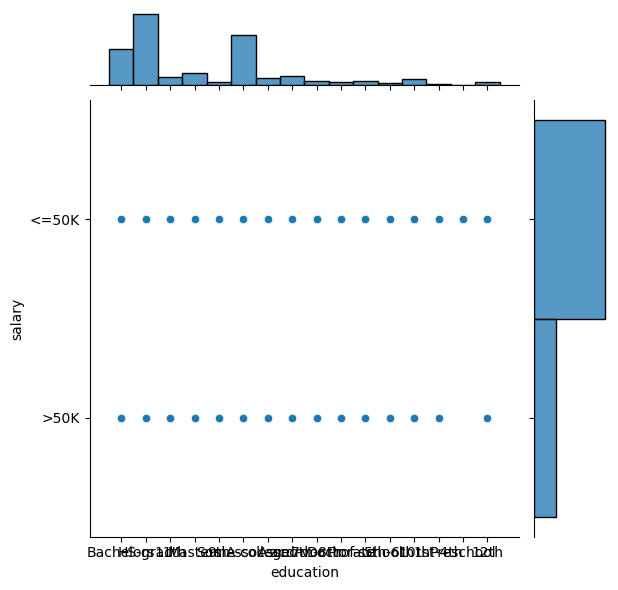

In [52]:
sns.jointplot(x="education",y="salary",data=df)

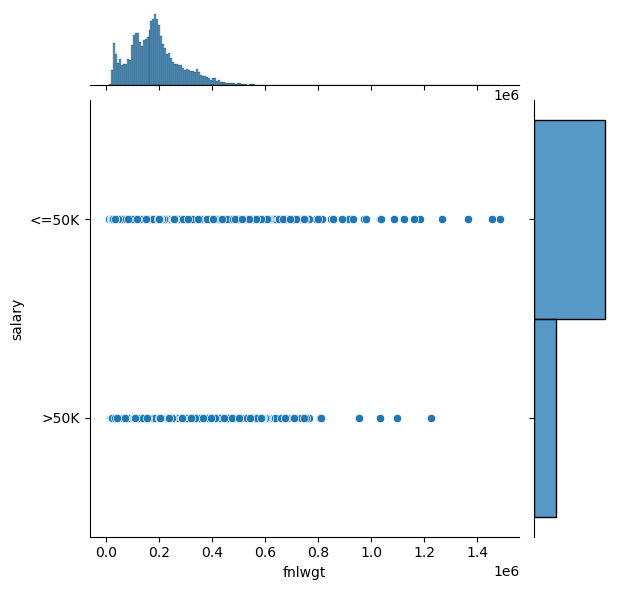

In [53]:
sns.jointplot(x="fnlwgt",y="salary",data=df)

<Axes: xlabel='age', ylabel='salary'>

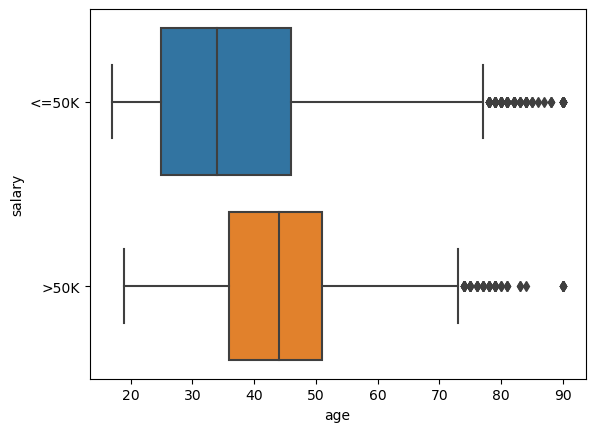

In [54]:
sns.boxplot(x="age",y="salary",data=df)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
x=df.drop('salary',axis=1)
y=df['salary']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=46)

/tmp/ipykernel_32/1287727449.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x.corr())


<Axes: >

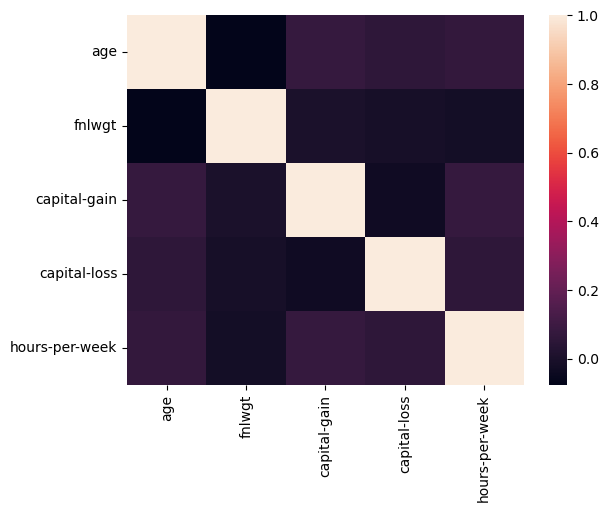

In [57]:
sns.heatmap(x.corr())

In [79]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in ['workclass', 'education', 'marital-status', 'occupation', 'race', 'sex','native-country']:

  x_train[i]  = l.fit_transform(x_train[i])
  x_test[i] = l.transform(x_test[i])

In [80]:
x_train

,age,workclass,fnlwgt,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
28292,54,4,98436,12,2,8,4,1,0,0,40,39
14767,39,4,139906,11,0,8,4,0,0,0,81,39
484,52,0,271749,2,4,0,2,1,594,0,40,39
3348,30,4,116508,11,2,3,4,1,0,0,40,11
20224,37,4,189878,14,2,10,4,1,0,0,50,39
...,...,...,...,...,...,...,...,...,...,...,...,...
18874,44,4,889965,11,2,6,4,0,3137,0,30,39
23924,18,4,31983,2,4,1,4,0,0,0,20,39
30248,51,4,154342,12,2,10,4,1,7688,0,45,39
23365,64,4,180624,7,4,10,4,0,0,0,30,39


In [81]:
x_test

,age,workclass,fnlwgt,education,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
11568,32,4,313729,11,2,1,4,1,0,0,40,39
28705,59,1,48102,12,4,10,4,0,0,0,40,0
4451,19,4,246226,11,4,3,4,0,0,0,40,39
26294,27,4,134566,11,4,1,4,1,0,0,40,39
10658,57,4,112840,15,2,12,4,1,0,0,50,39
...,...,...,...,...,...,...,...,...,...,...,...,...
5130,40,4,217120,0,0,3,4,1,0,0,50,39
17935,23,4,140798,9,4,1,4,0,0,0,40,39
4770,18,4,130849,1,4,8,4,0,0,0,8,39
3771,51,4,195105,11,0,9,4,0,0,0,40,39


In [82]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
x_train=m.fit_transform(x_train)
x_test=m.transform(x_test)

In [83]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=4)
logreg.fit(x_train,y_train)

LogisticRegression(random_state=4)

In [84]:
pred=logreg.predict(x_test)
pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [85]:
print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.7980
Test set score: 0.8014
